In [7]:
import requests

In [16]:
url = "https://www.courtlistener.com/api/rest/v3/search/?q=%22pierc*%20corporate%20veil%22~50&type=o&order_by=score%20desc&stat_Precedential=on&filed_after=09%2F29%2F2013"

In [17]:
pcv_data = requests.get(url)

In [44]:
pcv_json = pcv_data.json()

In [60]:
pcv_json

{'count': 2885,
 'next': None,
 'previous': 'https://www.courtlistener.com/api/rest/v3/search/?filed_after=09%2F29%2F2013&order_by=score+desc&page=144&q=%22pierc%2A+corporate+veil%22~50&stat_Precedential=on&type=o',
 'results': [{'absolute_url': '/opinion/7327602/state-farm-mutual-automobile-insurance-co-v-performance-orthopaedics/',
   'attorney': 'Bradley Scott McPherson, Stacey Cole Ibarra, David Ira Spector, Akerman LLP, West Palm Beach, FL, for Plaintiff., Peter Ronai Goldman, Christina P. Lehm, Lester Jerome Perling, Scott Douglas Knapp, Broad and Cassel LLP, Michael Patrick Hamaway, Jason Ari Smith, Mombach, Boyle, Hardin <& Simmons, P.A., Fort Lauderdale, FL, Andrew Brian Albritton, Rhett Conlon Parker, Sharon Carlstedt Britton, Phelps Dunbar LLP, Jason Paul Stearns, Lawrence Phillip Ingram, Freeborn & Peters LLP, Tampa, FL, Lorelei Jane Van Wey, Martin B. Goldberg, Nicholas Andrew Ortiz, Lash & Goldberg, Ryan K, Stumphauzer, Christopher Ellis Gottfried, Jeffrey Henry Slo-man, 

In [50]:
pcv_json.keys()

page_x_results = pcv_json['results'].copy()
len(page_x_results)

20

In [55]:
pcv_json['next'].split("&")[2]

'page=2'

In [56]:
while pcv_json['next']:
    print(pcv_json['next'].split("&")[2])
    url = pcv_json['next']
    pcv_data = requests.get(url)
    pcv_json = pcv_data.json()
    page_copy = pcv_json['results'].copy()
    page_x_results.extend(page_copy)

page=2
page=3
page=4
page=5
page=6
page=7
page=8
page=9
page=10
page=11
page=12
page=13
page=14
page=15
page=16
page=17
page=18
page=19
page=20
page=21
page=22
page=23
page=24
page=25
page=26
page=27
page=28
page=29
page=30
page=31
page=32
page=33
page=34
page=35
page=36
page=37
page=38
page=39
page=40
page=41
page=42
page=43
page=44
page=45
page=46
page=47
page=48
page=49
page=50
page=51
page=52
page=53
page=54
page=55
page=56
page=57
page=58
page=59
page=60
page=61
page=62
page=63
page=64
page=65
page=66
page=67
page=68
page=69
page=70
page=71
page=72
page=73
page=74
page=75
page=76
page=77
page=78
page=79
page=80
page=81
page=82
page=83
page=84
page=85
page=86
page=87
page=88
page=89
page=90
page=91
page=92
page=93
page=94
page=95
page=96
page=97
page=98
page=99
page=100
page=101
page=102
page=103
page=104
page=105
page=106
page=107
page=108
page=109
page=110
page=111
page=112
page=113
page=114
page=115
page=116
page=117
page=118
page=119
page=120
page=121
page=122
page=123
page=124

In [57]:
len(page_x_results)

2885

In [58]:
type(page_x_results)

list

In [59]:
type(page_x_results[0])

dict

In [61]:
pcv_json['results'] = page_x_results

In [62]:
len(pcv_json['results'])

2885

In [63]:
import pickle


In [64]:
with open('pcv.pickle', 'wb') as handle:
    pickle.dump(pcv_json, handle, pickle.HIGHEST_PROTOCOL)

result of 'curl -X OPTIONS "https://www.courtlistener.com/api/rest/v3/search/"

{
"name":"Search List",
"description":"",
"renders":["application/json","text/html","application/xml"],
"parses":["application/json","application/x-www-form-urlencoded","multipart/form-data","application/xml"]
}

the query I used:

curl -o pcv_13.json "https://www.courtlistener.com/api/rest/v3/search/?q=%22pierc*%20corporate%20veil%22~50&type=o&order_by=score%20desc&stat_Precedential=on&filed_after=09%2F29%2F2013"

In [66]:
import pandas as pd

In [71]:
pcv_dict = pd.read_pickle('pcv.pickle')

In [72]:
pcv_df = pd.DataFrame.from_dict(pcv_dict)

In [78]:
pcv_df.results.head()[0]

{'absolute_url': '/opinion/3192066/matter-of-agai-v-diontech-consulting-inc/',
 'attorney': '',
 'author_id': None,
 'caseName': 'Matter of Agai v. Diontech Consulting, Inc.',
 'caseNameShort': '',
 'citation': ['138 A.D.3d 736', '29 N.Y.S.3d 441'],
 'citeCount': 0,
 'cites': None,
 'cluster_id': 3192066,
 'court': 'Appellate Division of the Supreme Court of the State of New York',
 'court_citation_string': 'N.Y. App. Div.',
 'court_exact': 'nyappdiv',
 'court_id': 'nyappdiv',
 'dateArgued': None,
 'dateFiled': '2016-04-06T00:00:00-07:00',
 'dateReargued': None,
 'dateReargumentDenied': None,
 'docketNumber': '2013-10303',
 'docket_id': 3051409,
 'download_url': 'http://www.courts.state.ny.us/reporter/3dseries/2016/2016_02646.htm',
 'id': 3191961,
 'joined_by_ids': None,
 'judge': 'Mastro, Hall, Miller, Lasalle',
 'lexisCite': None,
 'local_path': None,
 'neutralCite': None,
 'non_participating_judge_ids': None,
 'pagerank': None,
 'panel_ids': None,
 'per_curiam': None,
 'scdb_id': ''

In [101]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
cites_list = []

In [116]:
for row in pcv_df.results:
    if row['cites']:
        cites_list.append(len(row['cites']))
    else:
        cites_list.append(0)

In [117]:
len(cites_list)

2885

In [118]:
from collections import Counter

In [144]:
cites_list[0:10]

[0, 4, 4, 11, 0, 0, 3, 0, 0, 0]

In [141]:
cites_df = pd.DataFrame(cites_list, columns=['cites'])

In [142]:
# this describe the distribution of 'cites' across the PCV cases
cites_df.describe()

,cites
count,2885.000000
mean,10.802426
std,41.979923
min,0.000000
25%,0.000000
50%,3.000000
75%,13.000000
max,963.000000


In [120]:
num_cites = Counter(cites_list)

In [122]:
num_cites_dict = dict(num_cites)

res = {key: val for key, val in sorted(num_cites_dict.items(), key = lambda ele: ele[0])}

In [131]:
cites = pd.DataFrame.from_dict(res, orient='index')

In [132]:
cites.head()

,0
0,1222
1,94
2,70
3,143
4,82


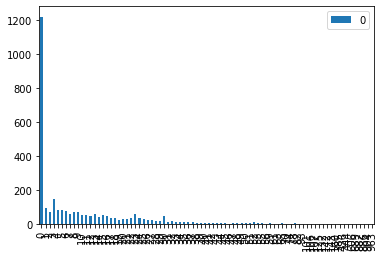

In [133]:
cites.plot(kind='bar')

See the "next" and the page # to determine which page # you're on, and how many results you still have to go -- use the "count" field to double-check. 